# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

    100% |████████████████████████████████| 12.6MB 55kB/s  eta 0:00:01
    100% |████████████████████████████████| 512kB 1.5MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 3.1MB/s eta 0:00:01
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib==2.2.2)
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.2.2)
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.2.2)
    100% |████████████████████████████████| 952kB 737kB/s eta 0:00:01
    100% |████████████████████████████████| 12.2MB 57kB/s  eta 0:00:01
    100% |████████████████████████████████| 573kB 1.3MB/s eta 0:00:01
  Found existing installation: pytz 2017.3
    Uninstalling pytz-2017.3:
      Successfully uninstalled pytz-2017.3
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-

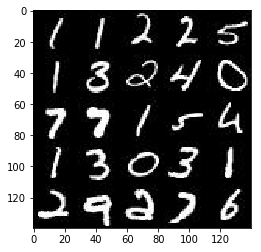

In [2]:
!pip install -U matplotlib==2.2.2
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

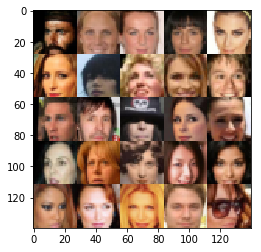

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "input_real")
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), "z_input")
    learning_rate = tf.placeholder(tf.float32, name="lr")

    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    keep_prob = 0.90

    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        x1 = tf.maximum(alpha * x1, x1)
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        flat = tf.reshape(x3, (-1,  4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    keep_prob = 0.90
    
    with tf.variable_scope('generator', reuse=not is_train):
        gen1 = tf.layers.dense(z, 7*7*512)
        gen1 = tf.reshape(gen1, (-1, 7, 7, 512))
        gen1 = tf.layers.batch_normalization(gen1, training=is_train)
        gen1 = tf.maximum(alpha * gen1, gen1)
        gen2 = tf.layers.conv2d_transpose(gen1, 256, 5, strides=2, padding='same', activation=None)
        gen2 = tf.layers.batch_normalization(gen2, training=is_train)
        gen2 = tf.maximum(alpha * gen2, gen2)
        gen2 = tf.nn.dropout(gen2, keep_prob=keep_prob)
        gen3 = tf.layers.conv2d_transpose(gen2, 128, 5, strides=2, padding='same', activation=None)
        gen3 = tf.layers.batch_normalization(gen3, training=is_train)
        gen3 = tf.maximum(alpha * gen3, gen3)   
        gen3 = tf.nn.dropout(gen3, keep_prob=keep_prob)
    
        logits = tf.layers.conv2d_transpose(gen3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    smooth = 0.1
    g_output = generator(input_z, out_channel_dim)
    disc_output_real, disc_logits_real = discriminator(input_real)
    disc_output_fake, disc_logits_fake = discriminator(g_output, reuse=True)
    
    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = disc_logits_real, labels = tf.ones_like(disc_output_real) * (1 - smooth)))
    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = disc_logits_fake, labels = tf.zeros_like(disc_output_fake)))
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = disc_logits_fake, labels = tf.ones_like(disc_output_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    
    train_vars = tf.trainable_variables()
    disc_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    with tf.control_dependencies(update_ops):
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)
    
    return disc_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)

    saver = tf.train.Saver()
    losses = []
    steps = 0
    total_steps = epoch_count * batch_size

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(disc_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(gen_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}".format(epoch_i+1),
                            "Generator Loss: {:.4f}".format(train_loss_g),
                            "Discriminator Loss: {:.4f}...".format(train_loss_d))
                    
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
        saver.save(sess, './generator.ckpt')
    
    return losses

                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


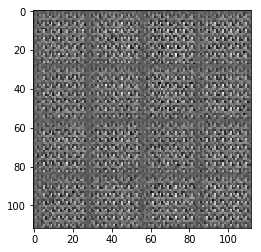

Epoch 1 Generator Loss: 3.6187 Discriminator Loss: 0.4171...
Epoch 1 Generator Loss: 5.6922 Discriminator Loss: 0.3581...
Epoch 1 Generator Loss: 4.8917 Discriminator Loss: 0.3572...
Epoch 1 Generator Loss: 4.3235 Discriminator Loss: 0.8586...
Epoch 1 Generator Loss: 3.3874 Discriminator Loss: 0.4026...
Epoch 1 Generator Loss: 7.4967 Discriminator Loss: 3.4631...
Epoch 1 Generator Loss: 0.1453 Discriminator Loss: 2.8523...
Epoch 1 Generator Loss: 1.8190 Discriminator Loss: 1.6107...
Epoch 1 Generator Loss: 1.3730 Discriminator Loss: 1.1471...
Epoch 1 Generator Loss: 1.7802 Discriminator Loss: 0.9901...


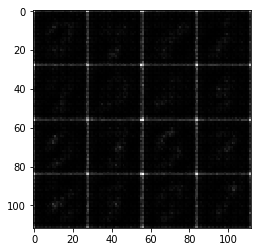

Epoch 1 Generator Loss: 1.2331 Discriminator Loss: 1.0572...
Epoch 1 Generator Loss: 0.4024 Discriminator Loss: 1.6791...
Epoch 1 Generator Loss: 0.7659 Discriminator Loss: 1.3454...
Epoch 1 Generator Loss: 1.0607 Discriminator Loss: 1.2405...
Epoch 1 Generator Loss: 1.7085 Discriminator Loss: 1.3404...
Epoch 1 Generator Loss: 2.1251 Discriminator Loss: 1.4398...
Epoch 1 Generator Loss: 1.5703 Discriminator Loss: 1.1327...
Epoch 1 Generator Loss: 1.2585 Discriminator Loss: 1.0160...
Epoch 1 Generator Loss: 1.2694 Discriminator Loss: 0.9927...
Epoch 1 Generator Loss: 1.0388 Discriminator Loss: 1.0182...


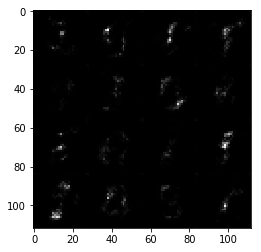

Epoch 1 Generator Loss: 1.4512 Discriminator Loss: 1.1132...
Epoch 1 Generator Loss: 1.3575 Discriminator Loss: 1.0207...
Epoch 1 Generator Loss: 1.5659 Discriminator Loss: 1.0285...
Epoch 1 Generator Loss: 1.1486 Discriminator Loss: 1.0437...
Epoch 1 Generator Loss: 1.3462 Discriminator Loss: 1.0054...
Epoch 1 Generator Loss: 1.7185 Discriminator Loss: 0.9460...
Epoch 1 Generator Loss: 1.0694 Discriminator Loss: 0.9454...
Epoch 1 Generator Loss: 1.6117 Discriminator Loss: 0.9889...
Epoch 1 Generator Loss: 2.1588 Discriminator Loss: 0.9032...
Epoch 1 Generator Loss: 1.4786 Discriminator Loss: 0.9268...


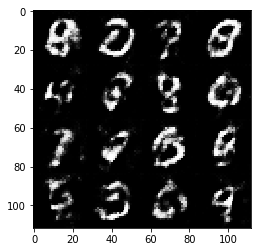

Epoch 1 Generator Loss: 1.0699 Discriminator Loss: 1.0016...
Epoch 1 Generator Loss: 1.5321 Discriminator Loss: 0.9117...
Epoch 1 Generator Loss: 0.7803 Discriminator Loss: 1.1542...
Epoch 1 Generator Loss: 0.7647 Discriminator Loss: 1.1533...
Epoch 1 Generator Loss: 2.2824 Discriminator Loss: 1.1090...
Epoch 1 Generator Loss: 1.7625 Discriminator Loss: 0.9586...
Epoch 1 Generator Loss: 1.3979 Discriminator Loss: 0.9938...
Epoch 1 Generator Loss: 1.3218 Discriminator Loss: 0.9692...
Epoch 1 Generator Loss: 0.9675 Discriminator Loss: 1.0750...
Epoch 1 Generator Loss: 1.3449 Discriminator Loss: 1.1123...


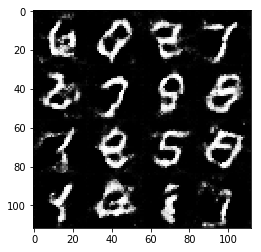

Epoch 1 Generator Loss: 0.8642 Discriminator Loss: 1.1680...
Epoch 1 Generator Loss: 1.0030 Discriminator Loss: 1.0526...
Epoch 1 Generator Loss: 1.3365 Discriminator Loss: 1.1841...
Epoch 1 Generator Loss: 0.7638 Discriminator Loss: 1.2537...
Epoch 1 Generator Loss: 1.1104 Discriminator Loss: 1.1758...
Epoch 1 Generator Loss: 1.2395 Discriminator Loss: 1.0711...
Epoch 2 Generator Loss: 1.1448 Discriminator Loss: 1.0862...
Epoch 2 Generator Loss: 1.1442 Discriminator Loss: 0.9863...
Epoch 2 Generator Loss: 1.0218 Discriminator Loss: 1.0798...
Epoch 2 Generator Loss: 1.2842 Discriminator Loss: 1.0382...


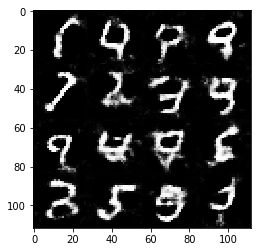

Epoch 2 Generator Loss: 1.8616 Discriminator Loss: 1.2522...
Epoch 2 Generator Loss: 1.2226 Discriminator Loss: 1.1154...
Epoch 2 Generator Loss: 0.7223 Discriminator Loss: 1.1991...
Epoch 2 Generator Loss: 1.0087 Discriminator Loss: 1.0740...
Epoch 2 Generator Loss: 1.3774 Discriminator Loss: 1.0175...
Epoch 2 Generator Loss: 0.8751 Discriminator Loss: 1.0984...
Epoch 2 Generator Loss: 1.8555 Discriminator Loss: 1.2368...
Epoch 2 Generator Loss: 0.8694 Discriminator Loss: 1.1271...
Epoch 2 Generator Loss: 1.1575 Discriminator Loss: 1.0382...
Epoch 2 Generator Loss: 1.1782 Discriminator Loss: 1.0783...


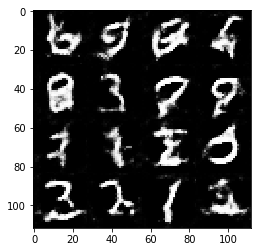

Epoch 2 Generator Loss: 1.1375 Discriminator Loss: 1.1166...
Epoch 2 Generator Loss: 0.9022 Discriminator Loss: 1.0771...
Epoch 2 Generator Loss: 0.9721 Discriminator Loss: 1.0685...
Epoch 2 Generator Loss: 1.0504 Discriminator Loss: 1.0607...
Epoch 2 Generator Loss: 1.1845 Discriminator Loss: 1.0716...
Epoch 2 Generator Loss: 1.2429 Discriminator Loss: 1.0637...
Epoch 2 Generator Loss: 1.6214 Discriminator Loss: 1.1623...
Epoch 2 Generator Loss: 0.8216 Discriminator Loss: 1.1730...
Epoch 2 Generator Loss: 1.0439 Discriminator Loss: 1.1106...
Epoch 2 Generator Loss: 1.3129 Discriminator Loss: 1.0124...


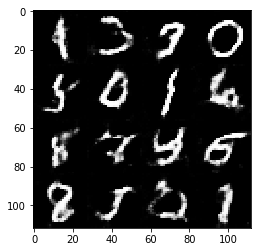

Epoch 2 Generator Loss: 1.4812 Discriminator Loss: 1.0485...
Epoch 2 Generator Loss: 1.2189 Discriminator Loss: 1.0989...
Epoch 2 Generator Loss: 0.9675 Discriminator Loss: 1.0881...
Epoch 2 Generator Loss: 0.6997 Discriminator Loss: 1.2074...
Epoch 2 Generator Loss: 1.3743 Discriminator Loss: 1.0143...
Epoch 2 Generator Loss: 0.5638 Discriminator Loss: 1.4084...
Epoch 2 Generator Loss: 1.0506 Discriminator Loss: 1.0628...
Epoch 2 Generator Loss: 1.5487 Discriminator Loss: 1.0799...
Epoch 2 Generator Loss: 0.7501 Discriminator Loss: 1.2126...
Epoch 2 Generator Loss: 1.0842 Discriminator Loss: 1.0363...


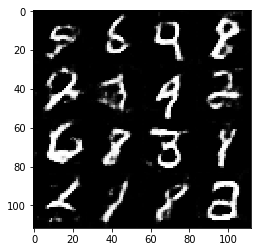

Epoch 2 Generator Loss: 1.2481 Discriminator Loss: 1.0173...
Epoch 2 Generator Loss: 1.1500 Discriminator Loss: 1.0087...
Epoch 2 Generator Loss: 1.4461 Discriminator Loss: 1.1180...
Epoch 2 Generator Loss: 1.5560 Discriminator Loss: 1.0646...
Epoch 2 Generator Loss: 1.2989 Discriminator Loss: 0.9601...
Epoch 2 Generator Loss: 1.3246 Discriminator Loss: 1.0306...
Epoch 2 Generator Loss: 1.4836 Discriminator Loss: 0.9760...
Epoch 2 Generator Loss: 0.6632 Discriminator Loss: 1.2278...
Epoch 2 Generator Loss: 1.1859 Discriminator Loss: 1.0333...
Epoch 2 Generator Loss: 1.2180 Discriminator Loss: 1.0081...


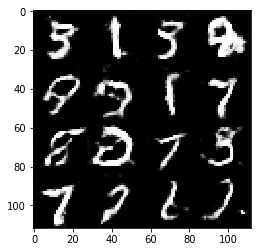

Epoch 2 Generator Loss: 1.5216 Discriminator Loss: 0.9195...
Epoch 2 Generator Loss: 0.9010 Discriminator Loss: 1.1154...
Epoch 2 Generator Loss: 1.0370 Discriminator Loss: 0.9756...


In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


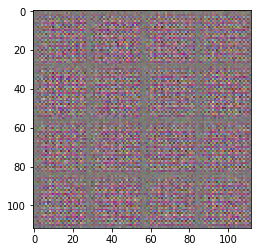

Epoch 1 Generator Loss: 1.5245 Discriminator Loss: 0.8111...
Epoch 1 Generator Loss: 4.9299 Discriminator Loss: 0.4143...
Epoch 1 Generator Loss: 6.5868 Discriminator Loss: 0.4392...
Epoch 1 Generator Loss: 2.3803 Discriminator Loss: 0.5372...
Epoch 1 Generator Loss: 1.1054 Discriminator Loss: 0.8835...
Epoch 1 Generator Loss: 1.4101 Discriminator Loss: 0.7385...
Epoch 1 Generator Loss: 1.5180 Discriminator Loss: 0.7993...
Epoch 1 Generator Loss: 1.5151 Discriminator Loss: 0.7455...
Epoch 1 Generator Loss: 2.2855 Discriminator Loss: 0.5852...
Epoch 1 Generator Loss: 4.9297 Discriminator Loss: 0.6179...


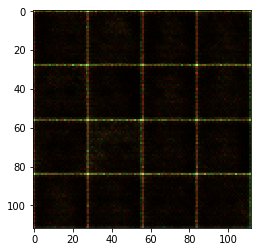

Epoch 1 Generator Loss: 2.1657 Discriminator Loss: 0.5599...
Epoch 1 Generator Loss: 0.5925 Discriminator Loss: 1.5862...
Epoch 1 Generator Loss: 3.6784 Discriminator Loss: 0.4360...
Epoch 1 Generator Loss: 1.9187 Discriminator Loss: 0.6747...
Epoch 1 Generator Loss: 5.8246 Discriminator Loss: 0.3860...
Epoch 1 Generator Loss: 2.6357 Discriminator Loss: 0.4666...
Epoch 1 Generator Loss: 4.7837 Discriminator Loss: 0.3979...
Epoch 1 Generator Loss: 2.1736 Discriminator Loss: 0.5383...
Epoch 1 Generator Loss: 3.3652 Discriminator Loss: 0.7799...
Epoch 1 Generator Loss: 0.9970 Discriminator Loss: 0.9405...


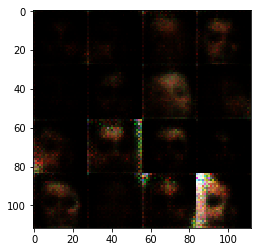

Epoch 1 Generator Loss: 4.0425 Discriminator Loss: 1.2618...
Epoch 1 Generator Loss: 2.1952 Discriminator Loss: 0.6516...
Epoch 1 Generator Loss: 0.7570 Discriminator Loss: 1.1314...
Epoch 1 Generator Loss: 0.6851 Discriminator Loss: 1.2295...
Epoch 1 Generator Loss: 1.2010 Discriminator Loss: 0.8792...
Epoch 1 Generator Loss: 0.6539 Discriminator Loss: 1.2025...
Epoch 1 Generator Loss: 1.5159 Discriminator Loss: 0.7919...
Epoch 1 Generator Loss: 2.1669 Discriminator Loss: 1.0128...
Epoch 1 Generator Loss: 1.6154 Discriminator Loss: 0.7907...
Epoch 1 Generator Loss: 0.1869 Discriminator Loss: 2.6680...


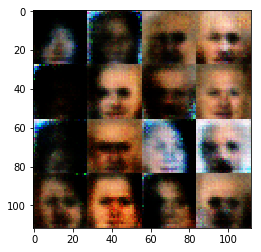

Epoch 1 Generator Loss: 2.1998 Discriminator Loss: 1.1547...
Epoch 1 Generator Loss: 0.3434 Discriminator Loss: 1.8787...
Epoch 1 Generator Loss: 0.6813 Discriminator Loss: 1.2880...
Epoch 1 Generator Loss: 1.9824 Discriminator Loss: 0.9630...
Epoch 1 Generator Loss: 0.4631 Discriminator Loss: 1.6569...
Epoch 1 Generator Loss: 2.1012 Discriminator Loss: 1.0957...
Epoch 1 Generator Loss: 0.5779 Discriminator Loss: 1.3824...
Epoch 1 Generator Loss: 0.1867 Discriminator Loss: 2.6429...
Epoch 1 Generator Loss: 1.9922 Discriminator Loss: 1.2853...
Epoch 1 Generator Loss: 0.7310 Discriminator Loss: 1.3058...


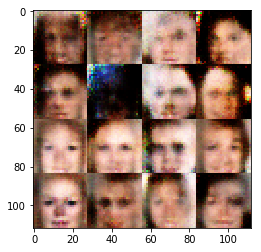

Epoch 1 Generator Loss: 2.3682 Discriminator Loss: 1.3044...
Epoch 1 Generator Loss: 1.4906 Discriminator Loss: 0.9527...
Epoch 1 Generator Loss: 0.3878 Discriminator Loss: 1.7227...
Epoch 1 Generator Loss: 0.8594 Discriminator Loss: 1.0353...
Epoch 1 Generator Loss: 0.8126 Discriminator Loss: 1.1165...
Epoch 1 Generator Loss: 0.2592 Discriminator Loss: 2.2072...
Epoch 1 Generator Loss: 1.3102 Discriminator Loss: 1.0685...
Epoch 1 Generator Loss: 1.0383 Discriminator Loss: 1.1030...
Epoch 1 Generator Loss: 1.2268 Discriminator Loss: 0.9775...
Epoch 1 Generator Loss: 1.6028 Discriminator Loss: 1.0852...


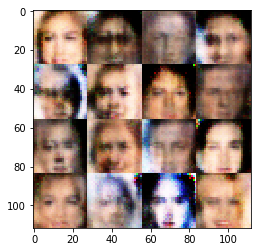

Epoch 1 Generator Loss: 1.9759 Discriminator Loss: 1.1840...
Epoch 1 Generator Loss: 1.6859 Discriminator Loss: 1.1549...
Epoch 1 Generator Loss: 1.2305 Discriminator Loss: 0.9916...
Epoch 1 Generator Loss: 0.3880 Discriminator Loss: 1.6379...
Epoch 1 Generator Loss: 1.8010 Discriminator Loss: 0.9619...
Epoch 1 Generator Loss: 1.3668 Discriminator Loss: 0.8546...
Epoch 1 Generator Loss: 0.7666 Discriminator Loss: 1.0965...
Epoch 1 Generator Loss: 3.0878 Discriminator Loss: 1.6174...
Epoch 1 Generator Loss: 1.1539 Discriminator Loss: 1.1383...
Epoch 1 Generator Loss: 1.5119 Discriminator Loss: 1.0658...


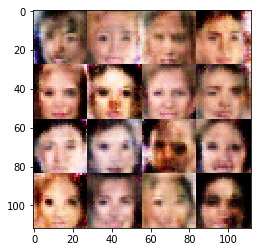

Epoch 1 Generator Loss: 0.8485 Discriminator Loss: 1.2134...
Epoch 1 Generator Loss: 1.5915 Discriminator Loss: 1.1523...
Epoch 1 Generator Loss: 0.5124 Discriminator Loss: 1.4120...
Epoch 1 Generator Loss: 0.7414 Discriminator Loss: 1.1503...
Epoch 1 Generator Loss: 1.0088 Discriminator Loss: 1.1621...
Epoch 1 Generator Loss: 0.6808 Discriminator Loss: 1.1962...
Epoch 1 Generator Loss: 0.7383 Discriminator Loss: 1.1440...
Epoch 1 Generator Loss: 1.9354 Discriminator Loss: 1.2722...
Epoch 1 Generator Loss: 1.1138 Discriminator Loss: 1.1128...
Epoch 1 Generator Loss: 0.4131 Discriminator Loss: 1.5808...


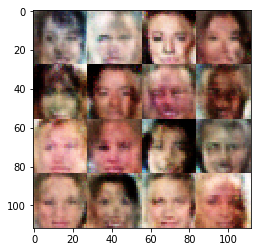

Epoch 1 Generator Loss: 2.1604 Discriminator Loss: 1.1804...
Epoch 1 Generator Loss: 1.3890 Discriminator Loss: 0.9134...
Epoch 1 Generator Loss: 0.4009 Discriminator Loss: 1.5978...
Epoch 1 Generator Loss: 1.0878 Discriminator Loss: 1.0327...
Epoch 1 Generator Loss: 0.6547 Discriminator Loss: 1.3322...
Epoch 1 Generator Loss: 0.4911 Discriminator Loss: 1.5520...
Epoch 1 Generator Loss: 1.0666 Discriminator Loss: 1.2170...
Epoch 1 Generator Loss: 0.6034 Discriminator Loss: 1.3657...
Epoch 1 Generator Loss: 2.4522 Discriminator Loss: 1.7050...
Epoch 1 Generator Loss: 1.8015 Discriminator Loss: 1.2889...


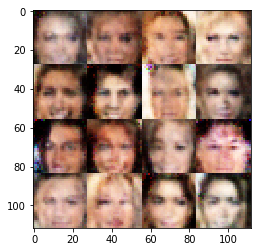

Epoch 1 Generator Loss: 0.5311 Discriminator Loss: 1.3852...
Epoch 1 Generator Loss: 1.3445 Discriminator Loss: 1.0016...
Epoch 1 Generator Loss: 0.9387 Discriminator Loss: 1.1762...
Epoch 1 Generator Loss: 1.5673 Discriminator Loss: 1.2739...
Epoch 1 Generator Loss: 2.3357 Discriminator Loss: 1.3240...
Epoch 1 Generator Loss: 1.2031 Discriminator Loss: 0.9454...
Epoch 1 Generator Loss: 0.8554 Discriminator Loss: 1.2681...
Epoch 1 Generator Loss: 0.8426 Discriminator Loss: 1.0840...
Epoch 1 Generator Loss: 0.4756 Discriminator Loss: 1.5482...
Epoch 1 Generator Loss: 0.7111 Discriminator Loss: 1.1956...


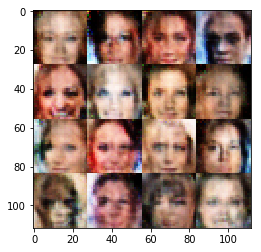

Epoch 1 Generator Loss: 1.5379 Discriminator Loss: 1.3187...
Epoch 1 Generator Loss: 0.9804 Discriminator Loss: 1.1312...
Epoch 1 Generator Loss: 1.4726 Discriminator Loss: 1.4505...


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.